### 1st

#### 각 hidden layer의 neuron의 수  
- hid_neu = 16  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = sigmoid 
- Output Layer, Activation = relu  
- optimizer : sgd
- loss function  : MSL 사용  

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 74.7128 - val_loss: 1.7067
Epoch 2/20
700/700 - 0s - loss: 0.8184 - val_loss: 0.2343
Epoch 3/20
700/700 - 0s - loss: 0.0934 - val_loss: 0.0247
Epoch 4/20
700/700 - 0s - loss: 0.0109 - val_loss: 0.0059
Epoch 5/20
700/700 - 0s - loss: 0.0054 - val_loss: 0.0052
Epoch 6/20
700/700 - 0s - loss: 0.0048 - val_loss: 0.0107
Epoch 7/20
700/700 - 0s - loss: 0.0048 - val_loss: 0.0045
Epoch 8/20
700/700 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 9/

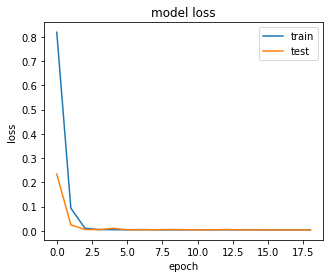

train loss= 0.004151033689933164
test loss= 0.004021565414344271



y actual value =  23.3
y predicted value = 26.192623



｜예측값 - 실제값｜= 2.892623
87.5853 %
1.99 초


In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import time

# y = a+ bx1 + cx2 ^2 + dx3^3 + e

def generator_sequential_model(hid_neu = 16, act_hid='selu', act_out='relu'):
    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = act_out, name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'mse')    
    return model 

def generator_nonlinear_regression_dataset(numofsamples = 1000,a = 1, b =3, c=5, d = 10, e=20 ):
    np.random.seed(0)
    X = np.random.rand(numofsamples,4)         # 입력값 만큼 랜덤으로 input data생성
    X[:,0]= 1
    X[:,2] = np.square(X[:,2])
    X[:,3] = np.power(X[:,3],3)
    
    coef = np.array([a,b,c,d])
    bias = e
    y = np.matmul(X,coef.transpose()) + bias
    return X, y

def plot_loss_curve(history):
    plt.figure(figsize = (5,4))
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    plt.show()
    
def predict_new_sample(model,x ,a = 1, b =3, c=5, d = 10, e=20):
    x= x.reshape(1,4)
    y_pred = model.predict(x)[0][0]
    y_actual = a*x[0][0]**0 + b*x[0][1] + c*(x[0][2]**2) + d*(x[0][3]**3) + e
    return y_pred, y_actual

def fit_and_time(epochs =40):
    start_time = time.time()
    history = model.fit(X, y,epochs=epochs, batch_size=16,verbose =2 , validation_split = 0.3)
    end_time = time.time()
    fitting = round(end_time - start_time,2)
    return fitting , history

def total_print() :
    print("train loss=", history.history['loss'][-1])
    print("test loss=",  history.history['val_loss'][-1])
    print('\n'*2)
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    print('\n'*2)
    accuracy = 1 - (abs(y_pred-y_actual)/y_actual)
    print('｜예측값 - 실제값｜=',round(abs(y_pred-y_actual),6) )
    print(round(100*accuracy,4), '%')
    print(fitting,'초')


model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

------------------------------------------------  
### 2nd

#### 각 hidden layer의 neuron의 수  
- hid_neu = 16  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = sigmoid 
- Output Layer, Activation = relu  
- optimizer : sgd
- #### loss function  : msle 수정

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 4.8450 - val_loss: 3.1281
Epoch 2/20
700/700 - 0s - loss: 2.6492 - val_loss: 2.1928
Epoch 3/20
700/700 - 0s - loss: 1.9735 - val_loss: 1.7129
Epoch 4/20
700/700 - 0s - loss: 1.5842 - val_loss: 1.4054
Epoch 5/20
700/700 - 0s - loss: 1.3213 - val_loss: 1.1871
Epoch 6/20
700/700 - 0s - loss: 1.1287 - val_loss: 1.0226
Epoch 7/20
700/700 - 0s - loss: 0.9806 - val_loss: 0.8934
Epoch 8/20
700/700 - 0s - loss: 0.8626 - val_loss: 0.7892
Epoch 9/20

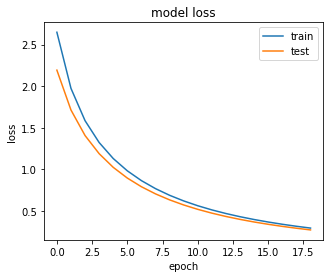

train loss= 0.2913741247994559
test loss= 0.26934718430042265



y actual value =  23.3
y predicted value = 14.862354



｜예측값 - 실제값｜ 8.437646
63.7869 %
2.03 초


In [6]:
def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()


------------------------------------------------  
### 3rd

#### 각 hidden layer의 neuron의 수  
- hid_neu = 16  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = sigmoid 
- Output Layer, Activation = relu
- #### opimizer = 'adam' 수정
- loss function  : msle 


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 9.7369 - val_loss: 8.6695
Epoch 2/20
700/700 - 0s - loss: 8.0501 - val_loss: 7.3361
Epoch 3/20
700/700 - 0s - loss: 6.9048 - val_loss: 6.3683
Epoch 4/20
700/700 - 0s - loss: 6.0414 - val_loss: 5.6122
Epoch 5/20
700/700 - 0s - loss: 5.3552 - val_loss: 5.0020
Epoch 6/20
700/700 - 0s - loss: 4.7942 - val_loss: 4.4973
Epoch 7/20
700/700 - 0s - loss: 4.3265 - val_loss: 4.0728
Epoch 8/20
700/700 - 0s - loss: 3.9310 - val_loss: 3.7114
Epoch 9/20

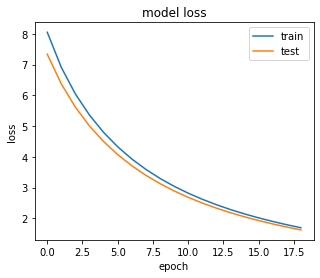

train loss= 1.695991621698652
test loss= 1.6252656173706055



y actual value =  23.3
y predicted value = 6.452669



｜예측값 - 실제값｜ 16.847331
27.6939 %
1.92 초


In [8]:
def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'adam', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()


------------------------------------------------  

### 4th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 16  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = sigmoid 
- Output Layer, Activation = relu
- #### opimizer = 'adadelta' 수정
- loss function  : msle 



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 10.8465 - val_loss: 10.7590
Epoch 2/20
700/700 - 0s - loss: 10.8424 - val_loss: 10.7548
Epoch 3/20
700/700 - 0s - loss: 10.8380 - val_loss: 10.7503
Epoch 4/20
700/700 - 0s - loss: 10.8335 - val_loss: 10.7457
Epoch 5/20
700/700 - 0s - loss: 10.8288 - val_loss: 10.7410
Epoch 6/20
700/700 - 0s - loss: 10.8240 - val_loss: 10.7361
Epoch 7/20
700/700 - 0s - loss: 10.8190 - val_loss: 10.7311
Epoch 8/20
700/700 - 0s - loss: 10.8138 - val_loss: 1

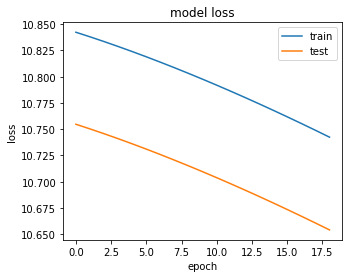

train loss= 10.742450719560896
test loss= 10.654128100077312



y actual value =  23.3
y predicted value = 0.037000358



｜예측값 - 실제값｜ 23.263
0.1588 %
1.81 초


In [15]:
def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'adadelta', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()



------------------------------------------------  

### 5th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 16  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = sigmoid 
- Output Layer, Activation = relu
- #### opimizer = 'adagrad' 수정
- loss function  : msle 



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 1s - loss: 10.4271 - val_loss: 10.1005
Epoch 2/20
700/700 - 0s - loss: 10.0396 - val_loss: 9.8270
Epoch 3/20
700/700 - 0s - loss: 9.8062 - val_loss: 9.6282
Epoch 4/20
700/700 - 0s - loss: 9.6266 - val_loss: 9.4675
Epoch 5/20
700/700 - 0s - loss: 9.4775 - val_loss: 9.3308
Epoch 6/20
700/700 - 0s - loss: 9.3487 - val_loss: 9.2109
Epoch 7/20
700/700 - 0s - loss: 9.2346 - val_loss: 9.1036
Epoch 8/20
700/700 - 0s - loss: 9.1317 - val_loss: 9.0062
Epoch 

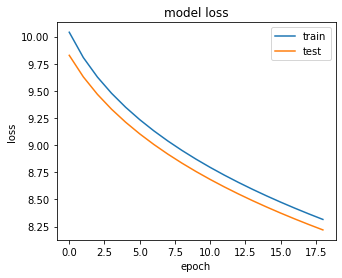

train loss= 8.315384505135672
test loss= 8.218851178487142



y actual value =  23.3
y predicted value = 0.5402552



｜예측값 - 실제값｜ 22.759745
2.3187 %
2.33 초


In [10]:
def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'adagrad', loss = 'msle')    
    return model 


model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()


------------------------------------------------  

### 6th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 16  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = sigmoid 
- Output Layer, Activation = relu
- #### opimizer = 'Ftrl' 수정
- loss function  : msle 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 1s - loss: 10.4761 - val_loss: 10.1559
Epoch 2/20
700/700 - 0s - loss: 10.0977 - val_loss: 9.8878
Epoch 3/20
700/700 - 0s - loss: 9.8689 - val_loss: 9.6925
Epoch 4/20
700/700 - 0s - loss: 9.6926 - val_loss: 9.5344
Epoch 5/20
700/700 - 0s - loss: 9.5459 - val_loss: 9.3997
Epoch 6/20
700/700 - 0s - loss: 9.4190 - val_loss: 9.2815
Epoch 7/20
700/700 - 0s - loss: 9.3064 - val_loss: 9.1755
Epoch 8/20
700/700 - 0s - loss: 9.2047 - val_loss: 9.0791
Epoch 

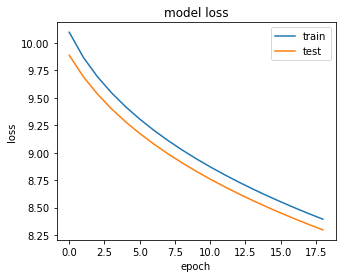

train loss= 8.394084303719657
test loss= 8.296459503173828



y actual value =  23.3
y predicted value = 0.5214819



｜예측값 - 실제값｜ 22.778518
2.2381 %
2.1 초


In [11]:


def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'Ftrl', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()


------------------------------------------------  

### 7th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 16  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- #### Hidden Layer, Activation 'selu' 수정
- #### Output Layer, Activation = 'elu' 수정
- #### opimizer = 'sgd'
- loss function  : msle 

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 6.1122 - val_loss: 3.5131
Epoch 2/20
700/700 - 0s - loss: 2.6566 - val_loss: 1.9610
Epoch 3/20
700/700 - 0s - loss: 1.6287 - val_loss: 1.3034
Epoch 4/20
700/700 - 0s - loss: 1.1299 - val_loss: 0.9377
Epoch 5/20
700/700 - 0s - loss: 0.8338 - val_loss: 0.7061
Epoch 6/20
700/700 - 0s - loss: 0.6388 - val_loss: 0.5477
Epoch 7/20
700/700 - 0s - loss: 0.5019 - val_loss: 0.4339
Epoch 8/20
700/700 - 0s - loss: 0.4018 - val_loss: 0.3492
Epoch 9/2

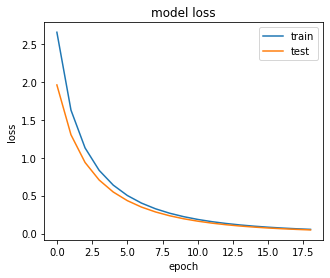

train loss= 0.05456197591764586
test loss= 0.047457134375969566



y actual value =  23.3
y predicted value = 19.090166



｜예측값 - 실제값｜ 4.209834
81.932 %
2.17 초


In [12]:


def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'selu', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'elu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()


------------------------------------------------  

### 8th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 16  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu
- #### Output Layer, Activation = selu 수정 
- opimizer = 'sgd' 수정
- loss function  : msle 



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 1s - loss: 5.9306 - val_loss: 3.3456
Epoch 2/20
700/700 - 0s - loss: 2.5198 - val_loss: 1.8507
Epoch 3/20
700/700 - 0s - loss: 1.5331 - val_loss: 1.2219
Epoch 4/20
700/700 - 0s - loss: 1.0571 - val_loss: 0.8741
Epoch 5/20
700/700 - 0s - loss: 0.7758 - val_loss: 0.6546
Epoch 6/20
700/700 - 0s - loss: 0.5913 - val_loss: 0.5052
Epoch 7/20
700/700 - 0s - loss: 0.4625 - val_loss: 0.3983
Epoch 8/20
700/700 - 0s - loss: 0.3685 - val_loss: 0.3191
Epoch 9/2

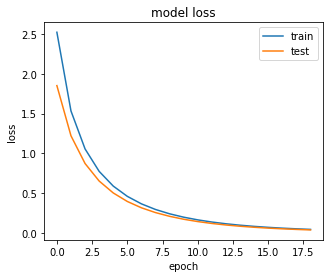

train loss= 0.0482976938358375
test loss= 0.04182265783349673



y actual value =  23.3
y predicted value = 19.397966



｜예측값 - 실제값｜ 3.902034
83.2531 %
2.21 초


In [13]:

def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'selu', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'selu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()


------------------------------------------------  

### 9th

#### 각 hidden layer의 neuron의 수  
- #### hid_neu = 24 
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
 
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu
- Output Layer, Activation = selu  
- opimizer = 'sgd'
- loss function  : msle 

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 24)                120       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 25        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 5.4274 - val_loss: 2.9180
Epoch 2/20
700/700 - 0s - loss: 2.1615 - val_loss: 1.5601
Epoch 3/20
700/700 - 0s - loss: 1.2757 - val_loss: 1.0035
Epoch 4/20
700/700 - 0s - loss: 0.8592 - val_loss: 0.7029
Epoch 5/20
700/700 - 0s - loss: 0.6186 - val_loss: 0.5173
Epoch 6/20
700/700 - 0s - loss: 0.4641 - val_loss: 0.3934
Epoch 7/20
700/700 - 0s - loss: 0.3580 - val_loss: 0.3061
Epoch 8/20
700/700 - 0s - loss: 0.2819 - val_loss: 0.2425
Epoch 9

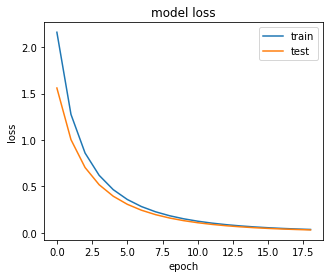

train loss= 0.03484083107539586
test loss= 0.03003265880048275



y actual value =  23.3
y predicted value = 19.95872



｜예측값 - 실제값｜ 3.341281
85.6597 %
2.08 초


In [18]:
def generator_sequential_model():

    model = Sequential( [
    
        Input(4, name = 'input_layer'),                             
        Dense(24, activation = 'selu', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)), 
        Dense(1, activation = 'selu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))
    
        ])
    
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 


model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()



## 10th  
  
#### 각 hidden layer의 neuron의 수  
- #### hid_neu = 32  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 1000개  
  

#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 5.0802 - val_loss: 2.6262
Epoch 2/20
700/700 - 0s - loss: 1.9262 - val_loss: 1.3745
Epoch 3/20
700/700 - 0s - loss: 1.1181 - val_loss: 0.8733
Epoch 4/20
700/700 - 0s - loss: 0.7456 - val_loss: 0.6067
Epoch 5/20
700/700 - 0s - loss: 0.5333 - val_loss: 0.4440
Epoch 6/20
700/700 - 0s - loss: 0.3983 - val_loss: 0.3364
Epoch 7/20
700/700 - 0s - loss: 0.3065 - val_loss: 0.2612
Epoch 8/20
700/700 - 0s - loss: 0.2411 - val_loss: 0.2067
Epoch 9

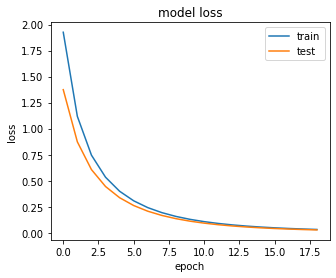

train loss= 0.03133051315588611
test loss= 0.026979884083072343



y actual value =  23.3
y predicted value = 20.136627



｜예측값 - 실제값｜ 3.163373
86.4233 %
2.09 초


In [20]:
def generator_sequential_model(hid_neu = 16):

    model = Sequential( [
    
        Input(4, name = 'input_layer'),                             
        Dense(hid_neu, activation = 'selu', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)), 
        Dense(1, activation = 'selu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))
    
        ])
    
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 


model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()



### 11th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 20회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 2000개  
  

#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 - 0s - loss: 3.5041 - val_loss: 1.3988
Epoch 2/20
1400/1400 - 0s - loss: 0.9318 - val_loss: 0.6223
Epoch 3/20
1400/1400 - 0s - loss: 0.4653 - val_loss: 0.3478
Epoch 4/20
1400/1400 - 0s - loss: 0.2732 - val_loss: 0.2156
Epoch 5/20
1400/1400 - 0s - loss: 0.1742 - val_loss: 0.1422
Epoch 6/20
1400/1400 - 0s - loss: 0.1170 - val_loss: 0.0980
Epoch 7/20
1400/1400 - 0s - loss: 0.0817 - val_loss: 0.0698
Epoch 8/20
1400/1400 - 0s - loss: 0.0588 - val_los

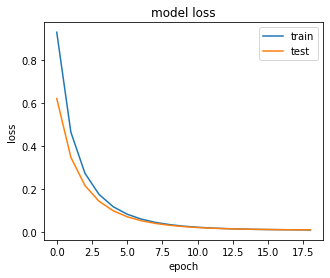

train loss= 0.008363434052360908
test loss= 0.008522923157239954



y actual value =  23.3
y predicted value = 22.722218



｜예측값 - 실제값｜ 0.577782
97.5202 %
3.41 초


In [23]:
model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(2000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 12th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 25회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 5000개  
  

#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 3500 samples, validate on 1500 samples
Epoch 1/25
3500/3500 - 1s - loss: 1.8836 - val_loss: 0.4576
Epoch 2/25
3500/3500 - 0s - loss: 0.2603 - val_loss: 0.1422
Epoch 3/25
3500/3500 - 0s - loss: 0.0930 - val_loss: 0.0595
Epoch 4/25
3500/3500 - 0s - loss: 0.0420 - val_loss: 0.0299
Epoch 5/25
3500/3500 - 0s - loss: 0.0225 - val_loss: 0.0177
Epoch 6/25
3500/3500 - 0s - loss: 0.0142 - val_loss: 0.0123
Epoch 7/25
3500/3500 - 0s - loss: 0.0105 - val_loss: 0.0098
Epoch 8/25
3500/3500 - 0s - loss: 0.0087 - val_lo

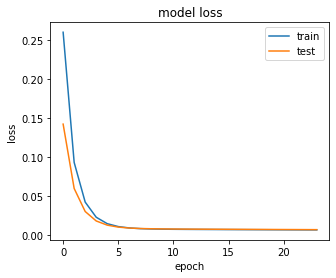

train loss= 0.006203173445005502
test loss= 0.006536092407380541



y actual value =  23.3
y predicted value = 23.67248



｜예측값 - 실제값｜ 0.37248
98.4014 %
9.31 초


In [24]:
model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(5000)
fitting, history = fit_and_time(epochs= 25)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 13th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 10000개  
  

#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 7000 samples, validate on 3000 samples
Epoch 1/30
7000/7000 - 1s - loss: 1.0721 - val_loss: 0.1436
Epoch 2/30
7000/7000 - 1s - loss: 0.0676 - val_loss: 0.0303
Epoch 3/30
7000/7000 - 1s - loss: 0.0185 - val_loss: 0.0124
Epoch 4/30
7000/7000 - 1s - loss: 0.0097 - val_loss: 0.0085
Epoch 5/30
7000/7000 - 1s - loss: 0.0077 - val_loss: 0.0075
Epoch 6/30
7000/7000 - 1s - loss: 0.0072 - val_loss: 0.0071
Epoch 7/30
7000/7000 - 1s - loss: 0.0069 - val_loss: 0.0069
Epoch 8/30
7000/7000 - 1s - loss: 0.0068 - val_lo

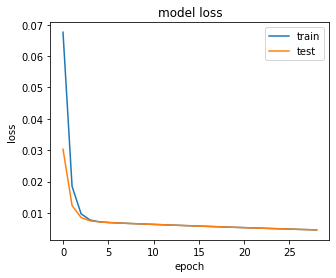

train loss= 0.004577512103265949
test loss= 0.004572956221799056



y actual value =  23.3
y predicted value = 24.031717



｜예측값 - 실제값｜ 0.731717
96.8596 %
21.69 초


In [25]:
model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(10000)
fitting, history = fit_and_time(epochs= 30)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 14th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 15000개  
  

#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 10500 samples, validate on 4500 samples
Epoch 1/30
10500/10500 - 1s - loss: 0.7465 - val_loss: 0.0586
Epoch 2/30
10500/10500 - 1s - loss: 0.0266 - val_loss: 0.0116
Epoch 3/30
10500/10500 - 1s - loss: 0.0092 - val_loss: 0.0074
Epoch 4/30
10500/10500 - 1s - loss: 0.0073 - val_loss: 0.0068
Epoch 5/30
10500/10500 - 1s - loss: 0.0070 - val_loss: 0.0066
Epoch 6/30
10500/10500 - 1s - loss: 0.0068 - val_loss: 0.0064
Epoch 7/30
10500/10500 - 1s - loss: 0.0066 - val_loss: 0.0062
Epoch 8/30
10500/10500 - 1s - loss

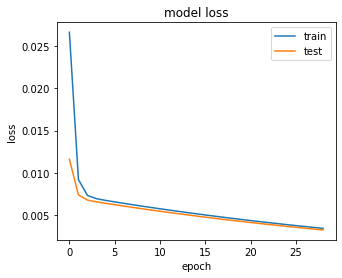

train loss= 0.00345010278906141
test loss= 0.003264787081629038



y actual value =  23.3
y predicted value = 24.314116



｜예측값 - 실제값｜ 1.014116
95.6476 %
33.81 초


In [26]:
model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(15000)
fitting, history = fit_and_time(epochs= 30)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 15th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 25000개  
  

#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/30
17500/17500 - 2s - loss: 0.4607 - val_loss: 0.0177
Epoch 2/30
17500/17500 - 2s - loss: 0.0099 - val_loss: 0.0075
Epoch 3/30
17500/17500 - 2s - loss: 0.0070 - val_loss: 0.0069
Epoch 4/30
17500/17500 - 2s - loss: 0.0067 - val_loss: 0.0066
Epoch 5/30
17500/17500 - 2s - loss: 0.0064 - val_loss: 0.0063
Epoch 6/30
17500/17500 - 2s - loss: 0.0061 - val_loss: 0.0061
Epoch 7/30
17500/17500 - 2s - loss: 0.0059 - val_loss: 0.0058
Epoch 8/30
17500/17500 - 2s - loss

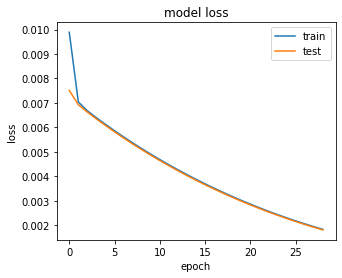

train loss= 0.0018315309201234152
test loss= 0.0018092609752590459



y actual value =  23.3
y predicted value = 24.73862



｜예측값 - 실제값｜ 1.438621
93.8257 %
57.34 초


In [27]:
model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(25000)
fitting, history = fit_and_time(epochs= 30)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 16th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 25000개  
  
### Batch Size   
- 100개  
  
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/30
17500/17500 - 1s - loss: 2.2225 - val_loss: 0.6260
Epoch 2/30
17500/17500 - 0s - loss: 0.3728 - val_loss: 0.2171
Epoch 3/30
17500/17500 - 0s - loss: 0.1475 - val_loss: 0.0986
Epoch 4/30
17500/17500 - 0s - loss: 0.0714 - val_loss: 0.0516
Epoch 5/30
17500/17500 - 0s - loss: 0.0391 - val_loss: 0.0301
Epoch 6/30
17500/17500 - 0s - loss: 0.0239 - val_loss: 0.0195
Epoch 7/30
17500/17500 - 0s - loss: 0.0162 - val_loss: 0.0140
Epoch 8/30
17500/17500 - 0s - loss

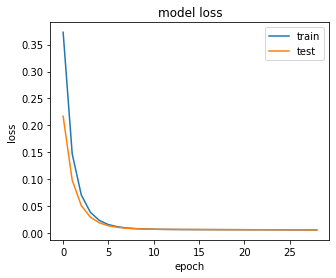

train loss= 0.0063087629952601025
test loss= 0.006375205566485723



y actual value =  23.3
y predicted value = 23.708544



｜예측값 - 실제값｜ 0.408544
98.2466 %
8.7 초


In [32]:
def fit_and_time(epochs =40, ba_si= 16):
    start_time = time.time()
    history = model.fit(X, y,epochs=epochs, batch_size= ba_si ,verbose =2 , validation_split = 0.3)
    end_time = time.time()
    fitting = round(end_time - start_time,2)
    return fitting , history

model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(25000)
fitting, history = fit_and_time(30,100)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 17th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 25000개  
  
### Batch Size   
- 200개  
  
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/30
17500/17500 - 1s - loss: 3.5077 - val_loss: 1.3980
Epoch 2/30
17500/17500 - 0s - loss: 0.9335 - val_loss: 0.6215
Epoch 3/30
17500/17500 - 0s - loss: 0.4664 - val_loss: 0.3472
Epoch 4/30
17500/17500 - 0s - loss: 0.2741 - val_loss: 0.2151
Epoch 5/30
17500/17500 - 0s - loss: 0.1748 - val_loss: 0.1417
Epoch 6/30
17500/17500 - 0s - loss: 0.1175 - val_loss: 0.0975
Epoch 7/30
17500/17500 - 0s - loss: 0.0821 - val_loss: 0.0695
Epoch 8/30
17500/17500 - 0s - loss

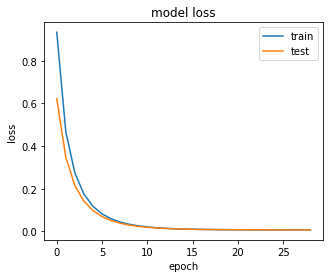

train loss= 0.007046125664242676
test loss= 0.007135284307102362



y actual value =  23.3
y predicted value = 23.402534



｜예측값 - 실제값｜ 0.102534
99.5599 %
5.96 초


In [33]:
model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(25000)
fitting, history = fit_and_time(30,200)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 18th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 25000개  
  
### Batch Size   
- 400개  
  
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/30
17500/17500 - 1s - loss: 5.0803 - val_loss: 2.6609
Epoch 2/30
17500/17500 - 0s - loss: 1.9283 - val_loss: 1.3983
Epoch 3/30
17500/17500 - 0s - loss: 1.1196 - val_loss: 0.8916
Epoch 4/30
17500/17500 - 0s - loss: 0.7464 - val_loss: 0.6217
Epoch 5/30
17500/17500 - 0s - loss: 0.5339 - val_loss: 0.4567
Epoch 6/30
17500/17500 - 0s - loss: 0.3987 - val_loss: 0.3473
Epoch 7/30
17500/17500 - 0s - loss: 0.3068 - val_loss: 0.2708
Epoch 8/30
17500/17500 - 0s - loss

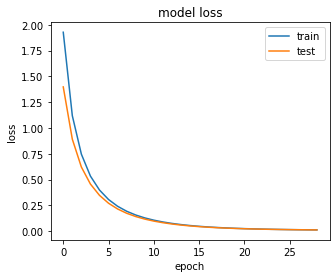

train loss= 0.012315147960824625
test loss= 0.012167033776640891



y actual value =  23.3
y predicted value = 21.920633



｜예측값 - 실제값｜ 1.379367
94.08 %
3.59 초


In [34]:

model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(25000)
fitting, history = fit_and_time(30,400)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 19th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 40000개  
  
### Batch Size   
- 400개  
  
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 28000 samples, validate on 12000 samples
Epoch 1/30
28000/28000 - 0s - loss: 3.9919 - val_loss: 1.7553
Epoch 2/30
28000/28000 - 0s - loss: 1.2066 - val_loss: 0.8293
Epoch 3/30
28000/28000 - 0s - loss: 0.6384 - val_loss: 0.4870
Epoch 4/30
28000/28000 - 0s - loss: 0.3939 - val_loss: 0.3155
Epoch 5/30
28000/28000 - 0s - loss: 0.2626 - val_loss: 0.2165
Epoch 6/30
28000/28000 - 0s - loss: 0.1837 - val_loss: 0.1545
Epoch 7/30
28000/28000 - 0s - loss: 0.1329 - val_loss: 0.1135
Epoch 8/30
28000/28000 - 0s - los

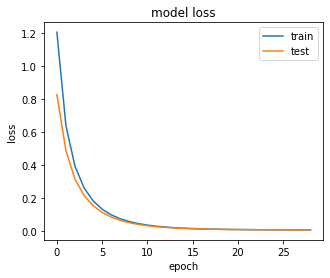

train loss= 0.007526137493550777
test loss= 0.007461452794571718



y actual value =  23.3
y predicted value = 23.128582



Ι예측값 - 실제값Ι 0.171418
99.2643 %
4.57 초


In [13]:
model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(40000)
fitting, history = fit_and_time(30,400)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 20th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 50000개  
  
### Batch Size   
- 400개  
  
#### hidden layer의 수  
- 2개

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32)                1056      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
Train on 35000 samples, validate on 15000 samples
Epoch 1/30
35000/35000 - 1s - loss: 2.1166 - val_loss: 0.3099
Epoch 2/30
35000/35000 - 0s - loss: 0.1476 - val_loss: 0.0633
Epoch 3/30
35000/35000 - 0s - loss: 0.0369 - val_loss: 0.0217
Epoch 4/30
35000/35000 - 0s - loss: 0.0158 - val_loss: 0.0124
Epoch 5/30
35000/35000 - 0s - loss: 0.0108 - val_loss: 0.0101
Epoch 6/30
35000/3500

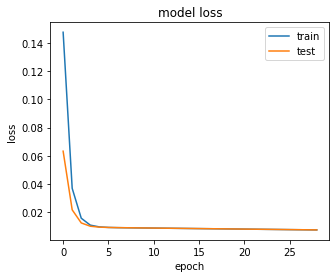

train loss= 0.007456285847084863
test loss= 0.007465673803041379



y actual value =  23.3
y predicted value = 24.795969



Ι예측값 - 실제값Ι 1.495969
93.5795 %
10.03 초


In [46]:
def generator_sequential_model(hid_neu = 32, act_hid='selu', act_out='selu'):
    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer2' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = act_out, name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(50000)
fitting, history = fit_and_time(30,200)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

### 21th  

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 70000개  
  
### Batch Size   
- 400개  
  
#### hidden layer의 수  
- 2개

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = selu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32)                1056      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
Train on 49000 samples, validate on 21000 samples
Epoch 1/30
49000/49000 - 1s - loss: 1.5755 - val_loss: 0.1508
Epoch 2/30
49000/49000 - 0s - loss: 0.0656 - val_loss: 0.0252
Epoch 3/30
49000/49000 - 0s - loss: 0.0163 - val_loss: 0.0114
Epoch 4/30
49000/49000 - 1s - loss: 0.0102 - val_loss: 0.0095
Epoch 5/30
49000/49000 - 1s - loss: 0.0093 - val_loss: 0.0091
Epoch 6/30
49000/4900

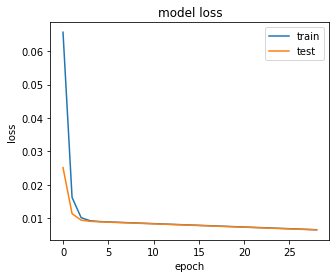

train loss= 0.006619802073632576
test loss= 0.006559697973231474



y actual value =  23.3
y predicted value = 24.899134



｜예측값 - 실제값｜ 1.599134
93.1368 %
14.45 초


In [38]:
model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(70000)
fitting, history = fit_and_time(30,200)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

# 22th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 25000개  
  
### Batch Size   
- 200개  
  
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- #### Output Layer, Activation = relu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/30
17500/17500 - 1s - loss: 3.6475 - val_loss: 1.4873
Epoch 2/30
17500/17500 - 0s - loss: 1.0006 - val_loss: 0.6723
Epoch 3/30
17500/17500 - 0s - loss: 0.5079 - val_loss: 0.3808
Epoch 4/30
17500/17500 - 0s - loss: 0.3024 - val_loss: 0.2388
Epoch 5/30
17500/17500 - 0s - loss: 0.1952 - val_loss: 0.1591
Epoch 6/30
17500/17500 - 0s - loss: 0.1325 - val_loss: 0.1105
Epoch 7/30
17500/17500 - 0s - loss: 0.0934 - val_loss: 0.0793
Epoch 8/30
17500/17500 - 0s - loss

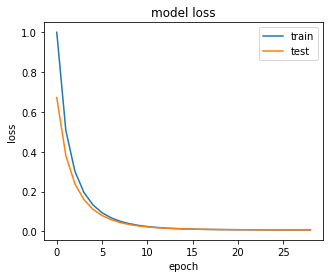

train loss= 0.0071193669576730045
test loss= 0.007208653104801972



y actual value =  23.3
y predicted value = 23.352169



Ι예측값 - 실제값Ι 0.052169
99.7761 %
5.83 초


In [44]:
def generator_sequential_model(hid_neu = 32, act_hid='selu', act_out='relu'):
    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = act_out, name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(25000)
fitting, history = fit_and_time(30,200)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

# 23th

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- ### numofsamples = 30000개  
  
### Batch Size   
- 200개  
  
#### hidden layer의 수  
- ### 2

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- #### Output Layer, Activation = relu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32)                1056      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
Train on 21000 samples, validate on 9000 samples
Epoch 1/30
21000/21000 - 1s - loss: 3.3250 - val_loss: 0.8219
Epoch 2/30
21000/21000 - 0s - loss: 0.4507 - val_loss: 0.2379
Epoch 3/30
21000/21000 - 0s - loss: 0.1512 - val_loss: 0.0943
Epoch 4/30
21000/21000 - 0s - loss: 0.0641 - val_loss: 0.0443
Epoch 5/30
21000/21000 - 0s - loss: 0.0321 - val_loss: 0.0245
Epoch 6/30
21000/21000

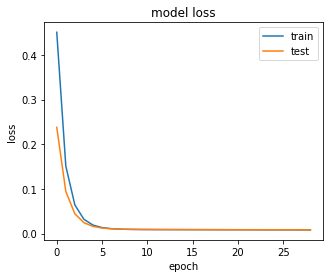

train loss= 0.008315353011268945
test loss= 0.008463769281903902



y actual value =  23.3
y predicted value = 24.666563



Ι예측값 - 실제값Ι 1.366563
94.1349 %
6.8 초


In [48]:
def generator_sequential_model(hid_neu = 32, act_hid='selu', act_out='relu'):
    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer2' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = act_out, name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(30000)
fitting, history = fit_and_time(30,200)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()